In [ ]:
#Importing the necessary libraries needed for our program
import numpy as np
import pandas as pd
import numpy as np
import kagglehub
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [ ]:
#Uploading dataset for players

df = pd.read_csv('/content/database.csv')

In [ ]:
df

,Player,Team,#,Nation,Position,Age,Minutes,Goals,Assists,Penalty Shoot on Goal,...,Goal-Creating Actions,Passes Completed,Passes Attempted,Pass Completion %,Progressive Passes,Carries,Progressive Carries,Dribble Attempts,Successful Dribbles,Date
0,Bruno Fernandes,Manchester United,8,POR,"FW,AM",29-343,90,0,0,0,...,0,43,60,"71,7",6,50,7,1,1,2024-08-16
1,Marcus Rashford,Manchester United,10,ENG,LW,26-290,90,0,0,0,...,0,22,30,"73,3",2,34,2,6,0,2024-08-16
2,Amad Diallo,Manchester United,16,CIV,RW,22-036,60,0,0,0,...,0,28,33,"84,8",1,22,0,1,1,2024-08-16
3,Alejandro Garnacho,Manchester United,17,ARG,RW,20-046,30,0,1,0,...,1,10,11,"90,9",0,11,2,2,0,2024-08-16
4,Mason Mount,Manchester United,7,ENG,AM,25-219,60,0,0,0,...,0,11,15,"73,3",1,16,0,2,0,2024-08-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,Ben Davies,Tottenham Hotspur,33,WAL,CB,31-225,61,0,0,0,...,0,30,33,"90,9",4,27,1,0,0,2024-12-05
4266,Pedro Porro,Tottenham Hotspur,23,ESP,RB,25-083,29,0,0,0,...,0,11,17,"64,7",0,11,0,0,0,2024-12-05
4267,Radu Drăgușin,Tottenham Hotspur,6,ROU,CB,22-306,90,0,0,0,...,0,48,60,"80,0",5,46,0,0,0,2024-12-05
4268,Archie Gray,Tottenham Hotspur,14,ENG,"RB,CB",18-268,90,0,0,0,...,0,45,57,"78,9",3,40,1,3,2,2024-12-05


In [ ]:
#Dropping columns not needed for our program

df.drop(columns=['Nation', '#','Age','Date',], inplace=True)

In [ ]:
df

,Player,Team,Position,Minutes,Goals,Assists,Penalty Shoot on Goal,Penalty Shoot,Total Shoot,Shoot on Target,...,Shot-Creating Actions,Goal-Creating Actions,Passes Completed,Passes Attempted,Pass Completion %,Progressive Passes,Carries,Progressive Carries,Dribble Attempts,Successful Dribbles
0,Bruno Fernandes,Manchester United,"FW,AM",90,0,0,0,0,6,3,...,2,0,43,60,"71,7",6,50,7,1,1
1,Marcus Rashford,Manchester United,LW,90,0,0,0,0,0,0,...,1,0,22,30,"73,3",2,34,2,6,0
2,Amad Diallo,Manchester United,RW,60,0,0,0,0,0,0,...,1,0,28,33,"84,8",1,22,0,1,1
3,Alejandro Garnacho,Manchester United,RW,30,0,1,0,0,2,0,...,3,1,10,11,"90,9",0,11,2,2,0
4,Mason Mount,Manchester United,AM,60,0,0,0,0,1,1,...,3,0,11,15,"73,3",1,16,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,Ben Davies,Tottenham Hotspur,CB,61,0,0,0,0,0,0,...,0,0,30,33,"90,9",4,27,1,0,0
4266,Pedro Porro,Tottenham Hotspur,RB,29,0,0,0,0,1,1,...,0,0,11,17,"64,7",0,11,0,0,0
4267,Radu Drăgușin,Tottenham Hotspur,CB,90,0,0,0,0,0,0,...,0,0,48,60,"80,0",5,46,0,0,0
4268,Archie Gray,Tottenham Hotspur,"RB,CB",90,0,0,0,0,1,1,...,1,0,45,57,"78,9",3,40,1,3,2


In [ ]:
#Dropping all the columns to find the mean number of goals of each player
df_new=df.drop(columns=['Team', 'Position', 'Minutes',
       'Penalty Shoot on Goal', 'Total Shoot', 'Shoot on Target',
       'Expected Goals (xG)','Assists','Non-Penalty xG (npxG)' , 'Penalty Shoot','Yellow Cards', 'Red Cards', 'Touches', 'Dribbles', 'Tackles', 'Blocks', 'Expected Assists (xAG)', 'Shot-Creating Actions', 'Passes Completed', 'Passes Attempted', 'Pass Completion %', 'Progressive Passes', 'Carries', 'Progressive Carries', 'Dribble Attempts', 'Goal-Creating Actions','Successful Dribbles'])


In [ ]:
#Checking the DataFrame
print(df_new)

                  Player  Goals
0        Bruno Fernandes      0
1        Marcus Rashford      0
2            Amad Diallo      0
3     Alejandro Garnacho      0
4            Mason Mount      0
...                  ...    ...
4265          Ben Davies      0
4266         Pedro Porro      0
4267       Radu Drăgușin      0
4268         Archie Gray      0
4269      Fraser Forster      0

[4270 rows x 2 columns]


In [ ]:
#Grouping and finding the mean number of goals of each player
df_grouped=df_new.groupby(by=["Player"]).mean()

In [ ]:
df_grouped.head()

,Goals
Player,
Aaron Cresswell,0.000000
Aaron Ramsdale,0.000000
Aaron Wan-Bissaka,0.153846
Abdoulaye Doucouré,0.000000
Abdul Fatawu Issahaku,0.000000


In [ ]:
#Finding the RMSE of the mean predictions
def rmse_from_mean(group):
    mean_goals = group['Goals'].mean()
    return np.sqrt(((group['Goals'] - mean_goals) ** 2).mean())

rmse_per_player = df.groupby('Player').apply(rmse_from_mean).reset_index()
rmse_per_player.columns = ['Player', 'Goal_rmse']
print(rmse_per_player)


                    Player  Goal_rmse
0          Aaron Cresswell   0.000000
1           Aaron Ramsdale   0.000000
2        Aaron Wan-Bissaka   0.360801
3       Abdoulaye Doucouré   0.000000
4    Abdul Fatawu Issahaku   0.000000
..                     ...        ...
473       Yunus Emre Konak   0.000000
474          Yves Bissouma   0.385695
475            Álex Moreno   0.000000
476         İlkay Gündoğan   0.000000
477       Łukasz Fabiański   0.000000

[478 rows x 2 columns]


/tmp/ipython-input-13-4098214637.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_per_player = df.groupby('Player').apply(rmse_from_mean).reset_index()


In [ ]:
df

,Player,Team,Position,Minutes,Goals,Assists,Penalty Shoot on Goal,Penalty Shoot,Total Shoot,Shoot on Target,...,Shot-Creating Actions,Goal-Creating Actions,Passes Completed,Passes Attempted,Pass Completion %,Progressive Passes,Carries,Progressive Carries,Dribble Attempts,Successful Dribbles
0,Bruno Fernandes,Manchester United,"FW,AM",90,0,0,0,0,6,3,...,2,0,43,60,"71,7",6,50,7,1,1
1,Marcus Rashford,Manchester United,LW,90,0,0,0,0,0,0,...,1,0,22,30,"73,3",2,34,2,6,0
2,Amad Diallo,Manchester United,RW,60,0,0,0,0,0,0,...,1,0,28,33,"84,8",1,22,0,1,1
3,Alejandro Garnacho,Manchester United,RW,30,0,1,0,0,2,0,...,3,1,10,11,"90,9",0,11,2,2,0
4,Mason Mount,Manchester United,AM,60,0,0,0,0,1,1,...,3,0,11,15,"73,3",1,16,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4265,Ben Davies,Tottenham Hotspur,CB,61,0,0,0,0,0,0,...,0,0,30,33,"90,9",4,27,1,0,0
4266,Pedro Porro,Tottenham Hotspur,RB,29,0,0,0,0,1,1,...,0,0,11,17,"64,7",0,11,0,0,0
4267,Radu Drăgușin,Tottenham Hotspur,CB,90,0,0,0,0,0,0,...,0,0,48,60,"80,0",5,46,0,0,0
4268,Archie Gray,Tottenham Hotspur,"RB,CB",90,0,0,0,0,1,1,...,1,0,45,57,"78,9",3,40,1,3,2


In [ ]:
#Listing all the player names
players = [
    "Aaron Cresswell",
    "Aaron Ramsdale",
    "Aaron Wan-Bissaka",
    "Abdoulaye Doucouré",
    "Abdul Fatawu Issahaku",
    "Adam Armstrong",
    "Adam Lallana",
    "Adam Smith",
    "Adam Webster",
    "Adam Wharton",
    "Adama Traoré",
    "Alejandro Garnacho",
    "Alex Iwobi",
    "Alex McCarthy",
    "Alex Scott",
    "Alexander Isak",
    "Alexis Mac Allister",
    "Alfie Pond",
    "Ali Al Hamadi",
    "Alisson",
    "Alphonse Areola",
    "Amad Diallo",
    "Amadou Onana",
    "Andreas Pereira",
    "Andrew Robertson",
    "André",
    "André Onana",
    "Andy Irving",
    "Anthony Elanga",
    "Anthony Gordon",
    "Antoine Semenyo",
    "Antonee Robinson",
    "Antony",
    "Archie Gray",
    "Arijanet Muric",
    "Armando Broja",
    "Asher Agbinone",
    "Ashley Young",
    "Axel Disasi",
    "Axel Tuanzebe",
    "Bart Verbruggen",
    "Ben Brereton",
    "Ben Davies",
    "Ben Johnson",
    "Ben Mee",
    "Ben White",
    "Benoît Badiashile",
    "Bernardo Silva",
    "Bernd Leno",
    "Beto",
    "Bilal El Khannouss",
    "Billy Gilmour",
    "Bobby Reid",
    "Boubacar Kamara",
    "Boubakary Soumaré",
    "Brajan Gruda",
    "Brennan Johnson",
    "Bruno Fernandes",
    "Bruno Guimarães",
    "Bryan Mbeumo",
    "Bukayo Saka",
    "Caleb Kporha",
    "Caleb Okoli",
    "Callum Hudson-Odoi",
    "Callum Wilson",
    "Calvin Bassey",
    "Cameron Archer",
    "Cameron Burgess",
    "Caoimhín Kelleher",
    "Carlos Alcaraz",
    "Carlos Baleba",
    "Carlos Forbs",
    "Carlos Soler",
    "Casemiro",
    "Chadi Riad",
    "Charlie Taylor",
    "Cheick Doucouré",
    "Chiedozie Ogbene",
    "Chiquinho",
    "Chris Richards",
    "Chris Wood",
    "Christian Eriksen",
    "Christian Nørgaard",
    "Christian Walton",
    "Christopher Nkunku",
    "Cody Gakpo",
    "Cole Palmer",
    "Conor Bradley",
    "Conor Chaplin",
    "Conor Coady",
    "Conor Townsend",
    "Craig Dawson",
    "Cristian Romero",
    "Crysencio Summerville",
    "Curtis Jones",
    "Daichi Kamada",
    "Dan Burn",
    "Dango Ouattara",
    "Daniel Jebbison",
    "Daniel Muñoz",
    "Daniel Podence",
    "Danilo",
    "Danny Ings",
    "Danny Welbeck",
    "Dara O'Shea",
    "Darwin Núñez",
    "David Brooks",
    "David Raya",
    "Dean Henderson",
    "Dean Huijsen",
    "Declan Rice",
    "Dejan Kulusevski",
    "Destiny Udogie",
    "Diego Carlos",
    "Diogo Dalot",
    "Diogo Jota",
    "Djed Spence",
    "Dominic Calvert-Lewin",
    "Dominic Solanke",
    "Dominik Szoboszlai",
    "Dwight McNeil",
    "Eberechi Eze",
    "Eddie Nketiah",
    "Ederson",
    "Edmond-Paris Maghoma",
    "Edson Álvarez",
    "Elliot Anderson",
    "Emerson Palmieri",
    "Emi Buendía",
    "Emil Krafth",
    "Emile Smith Rowe",
    "Emiliano Martínez",
    "Enes Ünal",
    "Enzo Fernández",
    "Eric da Silva Moreira",
    "Erling Haaland",
    "Ethan Nwaneri",
    "Ethan Pinnock",
    "Evan Ferguson",
    "Evanilson",
    "Ezri Konsa",
    "Fabian Schär",
    "Fabio Carvalho",
    "Facundo Buonanotte",
    "Federico Chiesa",
    "Ferdi Kadioglu",
    "Filip Jørgensen",
    "Flynn Downes",
    "Frank Onyeka",
    "Fraser Forster",
    "Gabriel Jesus",
    "Gabriel Magalhães",
    "Gabriel Martinelli",
    "George Edmundson",
    "George Hirst",
    "Georginio Rutter",
    "Gonçalo Guedes",
    "Guglielmo Vicario",
    "Guido Rodríguez",
    "Hamza Choudhury",
    "Harrison Armstrong",
    "Harrison Reed",
    "Harry Clarke",
    "Harry Maguire",
    "Harry Toffolo",
    "Harry Wilson",
    "Harry Winks",
    "Harvey Barnes",
    "Harvey Elliott",
    "Hwang Hee-chan",
    "Ian Maatsen",
    "Ibrahim Sangaré",
    "Ibrahima Konaté",
    "Idrissa Gana Gueye",
    "Igor",
    "Iliman Ndiaye",
    "Illia Zabarnyi",
    "Ismaila Sarr",
    "Issa Diop",
    "Jack Clarke",
    "Jack Grealish",
    "Jack Harrison",
    "Jack Hinshelwood",
    "Jack Stephens",
    "Jack Taylor",
    "Jacob Greaves",
    "Jacob Murphy",
    "Jacob Ramsey",
    "Jaden Philogene Bidace",
    "Jadon Sancho",
    "Jahmai Simpson-Pusey",
    "Jake O'Brien",
    "Jakub Kiwior",
    "Jakub Moder",
    "James Bree",
    "James Garner",
    "James Justin",
    "James Maddison",
    "James Mcatee",
    "James Milner",
    "James Tarkowski",
    "James Ward-Prowse",
    "Jamie Vardy",
    "Jan Bednarek",
    "Jan Paul van Hecke",
    "Jannik Vestergaard",
    "Jarell Quansah",
    "Jarrad Branthwaite",
    "Jarrod Bowen",
    "Jason Steele",
    "Jay Stansfield",
    "Jean-Clair Todibo",
    "Jean-Philippe Mateta",
    "Jean-Ricner Bellegarde",
    "Jefferson Lerma",
    "Jeffrey Schlupp",
    "Jens Cajuste",
    "Jeremy Doku",
    "Jeremy Sarmiento",
    "Jesper Lindstrøm",
    "Jhon Durán",
    "Joachim Andersen",
    "Joe Aribo",
    "Joe Gomez",
    "Joe Lumley",
    "Joe Willock",
    "Joelinton",
    "John McGinn",
    "John Stones",
    "Jonny Evans",
    "Jordan Ayew",
    "Jordan Pickford",
    "Jorge Cuenca",
    "Jorginho",
    "Joshua King",
    "Joshua Zirkzee",
    "José Sá",
    "Jota Silva",
    "João Félix",
    "João Gomes",
    "João Pedro",
    "Joël Veltman",
    "Joško Gvardiol",
    "Julian Araujo",
    "Julio Enciso",
    "Jurriën Timber",
    "Justin Devenny",
    "Justin Kluivert",
    "Jørgen Strand Larsen",
    "Kai Havertz",
    "Kalvin Phillips",
    "Kamaldeen Sulemana",
    "Kaoru Mitoma",
    "Kasey McAteer",
    "Keane Lewis-Potter",
    "Kenny Tete",
    "Kepa Arrizabalaga",
    "Kevin De Bruyne",
    "Kevin Schade",
    "Kieran Trippier",
    "Kiernan Dewsbury-Hall",
    "Kobbie Mainoo",
    "Konstantinos Mavropanos",
    "Kosta Nedeljković",
    "Kostas Tsimikas",
    "Kristoffer Ajer",
    "Kyle Walker",
    "Kyle Walker-Peters",
    "Lamare Bogarde",
    "Leandro Trossard",
    "Leif Davis",
    "Leny Yoro",
    "Leon Bailey",
    "Lesley Ugochukwu",
    "Levi Colwill",
    "Lewis Cook",
    "Lewis Dunk",
    "Lewis Hall",
    "Liam Delap",
    "Lisandro Martínez",
    "Lloyd Kelly",
    "Lucas Bergvall",
    "Lucas Digne",
    "Lucas Paquetá",
    "Luis Díaz",
    "Luis Guilherme",
    "Luis Sinisterra",
    "Luke Shaw",
    "Luke Thomas",
    "Luke Woolfenden",
    "Mads Hermansen",
    "Mads Roerslev",
    "Malo Gusto",
    "Manuel Akanji",
    "Manuel Ugarte Ribeiro",
    "Marc Cucurella",
    "Marc Guiu",
    "Marc Guéhi",
    "Marcos Senesi",
    "Marcus Harness",
    "Marcus Rashford",
    "Marcus Tavernier",
    "Mario Lemina",
    "Mark Flekken",
    "Mark Travers",
    "Martin Ødegaard",
    "Mason Holgate",
    "Mason Mount",
    "Massimo Luongo",
    "Mateo Kovačić",
    "Mateus Fernandes",
    "Matheus Cunha",
    "Matheus Nunes",
    "Mathias Jensen",
    "Mats Wieffer",
    "Matt Doherty",
    "Matt O'Riley",
    "Matthijs de Ligt",
    "Matty Cash",
    "Matz Sels",
    "Max Aarons",
    "Max Kilman",
    "Maxence Lacroix",
    "Maxwel Cornet",
    "Michael Keane",
    "Michail Antonio",
    "Micky van de Ven",
    "Miguel Almirón",
    "Mikel Merino",
    "Mikey Moore",
    "Mikkel Damsgaard",
    "Milos Kerkez",
    "Mohamed Salah",
    "Mohammed Kudus",
    "Moisés Caicedo",
    "Morato",
    "Morgan Gibbs-White",
    "Morgan Rogers",
    "Murillo",
    "Mykhailo Mudryk",
    "Myles Lewis-Skelly",
    "Nathan Aké",
    "Nathan Broadhead",
    "Nathan Collins",
    "Nathan Patterson",
    "Nathan Wood-Gordon",
    "Nathaniel Clyne",
    "Neco Williams",
    "Neto",
    "Nick Pope",
    "Niclas Füllkrug",
    "Nicolas Jackson",
    "Nicolás Domínguez",
    "Nikola Milenković",
    "Noni Madueke",
    "Noussair Mazraoui",
    "Nélson Semedo",
    "Odsonne Édouard",
    "Ola Aina",
    "Oleksandr Zinchenko",
    "Oliver Skipp",
    "Ollie Watkins",
    "Omari Hutchinson",
    "Orel Mangala",
    "Pablo Sarabia",
    "Pape Matar Sarr",
    "Patson Daka",
    "Pau Torres",
    "Paul Onuachu",
    "Pedro Neto",
    "Pedro Porro",
    "Pervis Estupiñán",
    "Phil Foden",
    "Philip Billing",
    "Radu Drăgușin",
    "Raheem Sterling",
    "Ramón Sosa",
    "Rasmus Højlund",
    "Rayan Aït-Nouri",
    "Raúl Jiménez",
    "Reece James",
    "Reiss Nelson",
    "Renato Veiga",
    "Ricardo Pereira",
    "Riccardo Calafiori",
    "Richarlison",
    "Rico Lewis",
    "Robert Sánchez",
    "Robin Olsen",
    "Rodri",
    "Rodrigo Bentancur",
    "Rodrigo Gomes",
    "Rodrigo Muniz",
    "Roman Dixon",
    "Roméo Lavia",
    "Ronnie Edwards",
    "Ross Barkley",
    "Ross Stewart",
    "Ryan Christie",
    "Ryan Fraser",
    "Ryan Gravenberch",
    "Ryan Manning",
    "Ryan Sessegnon",
    "Ryan Trevitt",
    "Ryan Yates",
    "Rúben Dias",
    "Sam Johnstone",
    "Sam Morsy",
    "Sammie Szmodics",
    "Samuel Amo-Ameyaw",
    "Samuel Edozie",
    "Sander Berge",
    "Sandro Tonali",
    "Santiago Bueno",
    "Saša Lukić",
    "Scott McTominay",
    "Sean Longstaff",
    "Sepp van den Berg",
    "Simon Adingra",
    "Son Heung-min",
    "Stefan Ortega",
    "Stephy Mavididi",
    "Sávio",
    "Séamus Coleman",
    "Taiwo Awoniyi",
    "Takehiro Tomiyasu",
    "Tariq Lamptey",
    "Taylor Harwood-Bellis",
    "Thiago",
    "Thomas Partey",
    "Tim Iroegbunam",
    "Timo Werner",
    "Timothy Castagne",
    "Toby Collyer",
    "Tom Cairney",
    "Tommy Doyle",
    "Tomáš Souček",
    "Tosin Adarabioyo",
    "Toti Gomes",
    "Trent Alexander-Arnold",
    "Trevoh Chalobah",
    "Tyler Adams",
    "Tyler Dibling",
    "Tyrell Malacia",
    "Tyrick Mitchell",
    "Tyrone Mings",
    "Valentino Livramento",
    "Victor Bernth Kristiansen",
    "Victor Lindelöf",
    "Virgil van Dijk",
    "Vitaliy Mykolenko",
    "Vitaly Janelt",
    "Vitezslav Jaros",
    "Vladimír Coufal",
    "Wataru Endo",
    "Wes Burns",
    "Wesley Fofana",
    "Wilfred Ndidi",
    "Will Hughes",
    "Will Lankshear",
    "William Osula",
    "William Saliba",
    "William Smallbone",
    "Willy Boly",
    "Wilson Odobert",
    "Wout Faes",
    "Yankuba Minteh",
    "Yasin Ayari",
    "Yehor Yarmoliuk",
    "Yerson Mosquera",
    "Yoane Wissa",
    "Youri Tielemans",
    "Yukinari Sugawara",
    "Yunus Emre Konak",
    "Yves Bissouma",
    "Álex Moreno",
    "İlkay Gündoğan",
    "Łukasz Fabiański"
]


In [ ]:
#Doing Linear Regression on a single player
df_player = df[df['Player'] == "Mohamed Salah"].copy()
print(df_player)
X=df_player.drop(columns=["Goals","Player","Team","Position","Pass Completion %"])
y=df_player["Goals"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42, train_size=0.8)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse_list=[]
rmse_list.append(rmse)
print(rmse_list)

             Player       Team Position  Minutes  Goals  Assists  \
51    Mohamed Salah  Liverpool       RW       90      1        1   
592   Mohamed Salah  Liverpool       RW       82      1        0   
910   Mohamed Salah  Liverpool       RW       90      1        2   
1048  Mohamed Salah  Liverpool       RW       90      0        0   
1267  Mohamed Salah  Liverpool       RW       90      0        1   
1732  Mohamed Salah  Liverpool       RW       90      1        0   
1855  Mohamed Salah  Liverpool       RW       72      0        0   
2390  Mohamed Salah  Liverpool       RW       90      1        1   
2740  Mohamed Salah  Liverpool       RW       90      1        0   
2815  Mohamed Salah  Liverpool       RW       89      1        0   
3205  Mohamed Salah  Liverpool       RW       90      1        1   
3580  Mohamed Salah  Liverpool       RW       90      2        0   
3937  Mohamed Salah  Liverpool       RW       83      1        1   
4073  Mohamed Salah  Liverpool       RW       90

In [ ]:
unique_player_list=df["Player"].unique().tolist()
print(unique_player_list)

['Bruno Fernandes', 'Marcus Rashford', 'Amad Diallo', 'Alejandro Garnacho', 'Mason Mount', 'Joshua Zirkzee', 'Kobbie Mainoo', 'Scott McTominay', 'Casemiro', 'Diogo Dalot', 'Lisandro Martínez', 'Harry Maguire', 'Jonny Evans', 'Noussair Mazraoui', 'Matthijs de Ligt', 'André Onana', 'Rodrigo Muniz', 'Raúl Jiménez', 'Alex Iwobi', 'Adama Traoré', 'Harry Wilson', 'Emile Smith Rowe', 'Tom Cairney', 'Saša Lukić', 'Jay Stansfield', 'Andreas Pereira', 'Harrison Reed', 'Antonee Robinson', 'Calvin Bassey', 'Issa Diop', 'Kenny Tete', 'Bernd Leno', 'Liam Delap', 'Ali Al Hamadi', 'Omari Hutchinson', 'Wes Burns', 'Ben Johnson', 'Conor Chaplin', 'Marcus Harness', 'Massimo Luongo', 'Jack Taylor', 'Sam Morsy', 'Leif Davis', 'Jacob Greaves', 'Luke Woolfenden', 'Axel Tuanzebe', 'Sammie Szmodics', 'Christian Walton', 'Diogo Jota', 'Cody Gakpo', 'Luis Díaz', 'Mohamed Salah', 'Dominik Szoboszlai', 'Alexis Mac Allister', 'Ryan Gravenberch', 'Andrew Robertson', 'Kostas Tsimikas', 'Virgil van Dijk', 'Jarell Quan

In [ ]:
#Doing Linear Regression on every player, finding the corresponding RMSEs, and appending them inside lists
count =0
rmse_list=[]
prediction_list=[]
players_list=[]
rmse0_players=[]

for player in unique_player_list:
  df_player = df[df['Player'] == player].copy()
  if len(df_player) < 2:
    count +=1
    rmse_list.append(0)
    prediction_list.append(0)
    players_list.append(player)
    rmse0_players.append(player)
    continue
  X=df_player.drop(columns=["Goals","Player","Team","Position","Pass Completion %"])
  y=df_player["Goals"]
  X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42, train_size=0.8)
  lr=LinearRegression()
  lr.fit(X_train,y_train)
  y_pred=lr.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  rmse_list.append(rmse)
  prediction_list.append(y_pred)
  players_list.append(player)
print(len(rmse_list))
print(count)


478
39


In [ ]:
#Checking linear regression results
print(rmse_list)
print(prediction_list)
print(players_list)
print(rmse0_players)

[np.float64(0.5005967734987742), np.float64(0.5690229291502539), np.float64(0.33484496018343035), np.float64(0.35091123110131056), np.float64(0.0), np.float64(0.773972098674202), np.float64(0.0), np.float64(0.0), np.float64(0.5944800697501623), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.7358461784152631), np.float64(0.0), np.float64(0.29597892652656965), np.float64(0.6443315013036403), np.float64(1.1681323803535104), np.float64(0.2372457351752171), np.float64(0.49426885940522913), np.float64(0.10970095023002535), np.float64(0.37750393809553984), np.float64(0.0), 0, np.float64(0.40299585207479993), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.8638028147237313), np.float64(0.0), np.float64(0.6504486393413395), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.683114761136666), np.float64(0.57735026918

In [ ]:
#Creating a DataFrame with the player names and there goal predictions
player_ypred_rmse_df = pd.DataFrame({
    'player': players_list,
    'y_pred': prediction_list,
})
player_ypred_rmse_df.head()

,player,y_pred
0,Bruno Fernandes,"[0.17497891821251835, 0.23118489733450245, 0.1..."
1,Marcus Rashford,"[0.02783782519635758, 0.9566502491060351, 0.98..."
2,Amad Diallo,"[0.502486507703046, -0.039019346440099134, 0.2..."
3,Alejandro Garnacho,"[0.5497552612808985, 0.25889398472695807, 0.01..."
4,Mason Mount,"[0.0, 0.0]"


In [ ]:
#Finding the mean of the linear regression's predictions for each player
for i in range(len(player_ypred_rmse_df)):
  if player_ypred_rmse_df['player'][i] in rmse0_players:
    continue
  else:
    player_ypred_rmse_df["y_pred"].iloc[i]= player_ypred_rmse_df['y_pred'].iloc[i].mean()

print(player_ypred_rmse_df)

                   player    y_pred
0         Bruno Fernandes  0.179716
1         Marcus Rashford  0.656239
2             Amad Diallo  0.250144
3      Alejandro Garnacho  0.273755
4             Mason Mount       0.0
..                    ...       ...
473        Tyrell Malacia         0
474             Leny Yoro         0
475          Tyrone Mings         0
476  Edmond-Paris Maghoma         0
477           Joshua King         0

[478 rows x 2 columns]


/tmp/ipython-input-21-2331575593.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  player_ypred_rmse_df["y_pred"].iloc[i]= player_ypred_rmse_df['y_pred'].iloc[i].mean()


In [ ]:
#Adding the RMSE values of each player into the DataFrame
player_ypred_rmse_df['rmse'] = rmse_list
print(player_ypred_rmse_df.head(5))

               player    y_pred      rmse
0     Bruno Fernandes  0.179716  0.500597
1     Marcus Rashford  0.656239  0.569023
2         Amad Diallo  0.250144  0.334845
3  Alejandro Garnacho  0.273755  0.350911
4         Mason Mount       0.0  0.000000


In [ ]:
#Sorting the predictions and the player names into the same order as our other lists
df_filtered = df_grouped.loc[df_grouped.index.isin(players)]
df_sorted = df_filtered.sort_values(by='Player', ascending=True).reset_index()
df_sorted['Player'] = pd.Categorical(df_sorted['Player'], categories=player_ypred_rmse_df['player'], ordered=True)
df_grouped_sorted = df_sorted.sort_values('Player')
print(df_grouped_sorted)

                   Player     Goals
57        Bruno Fernandes  0.142857
300       Marcus Rashford  0.285714
21            Amad Diallo  0.083333
11     Alejandro Garnacho  0.214286
307           Mason Mount  0.000000
..                    ...       ...
443        Tyrell Malacia  0.000000
271             Leny Yoro  0.000000
445          Tyrone Mings  0.000000
124  Edmond-Paris Maghoma  0.000000
234           Joshua King  0.000000

[478 rows x 2 columns]


In [ ]:
#Sorting the RMSE values for the mean predictions
rmse_per_player['Player'] = pd.Categorical(rmse_per_player['Player'], categories=player_ypred_rmse_df['player'], ordered=True)
rmse_per_player_sorted = rmse_per_player.sort_values('Player')
print(rmse_per_player_sorted[0:10])

                 Player  Goal_rmse
57      Bruno Fernandes   0.349927
300     Marcus Rashford   0.589015
21          Amad Diallo   0.276385
11   Alejandro Garnacho   0.410326
307         Mason Mount   0.000000
235      Joshua Zirkzee   0.557875
261       Kobbie Mainoo   0.000000
415     Scott McTominay   0.000000
73             Casemiro   0.276385
114         Diogo Dalot   0.000000


/tmp/ipython-input-25-2752321703.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


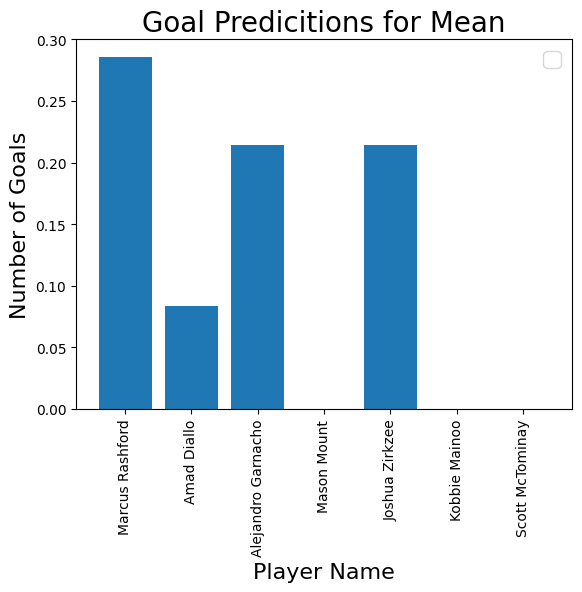

In [ ]:
#Plotting a bar chart showing the number of goals predicted by the mean predictor of each player
plt.bar(player_ypred_rmse_df['player'][1:8], df_grouped_sorted['Goals'][1:8])
plt.title("Goal Predicitions for Mean", fontsize=20)
plt.xlabel('Player Name',fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Number of Goals',fontsize=16)
plt.legend(fontsize=16)
plt.show()

/tmp/ipython-input-26-3683696456.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


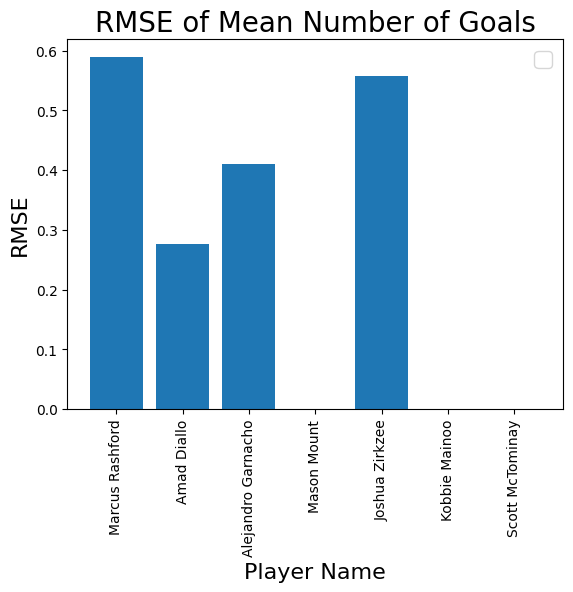

In [ ]:
#Plotting a bar chart showing the RMSE of each player's prediction for the Mean Predictor
plt.bar(player_ypred_rmse_df['player'][1:8],rmse_per_player_sorted['Goal_rmse'][1:8] )
plt.title("RMSE of Mean Number of Goals", fontsize=20)
plt.xlabel('Player Name',fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('RMSE',fontsize=16)
plt.legend(fontsize=16)
plt.show()

/tmp/ipython-input-27-1913164988.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


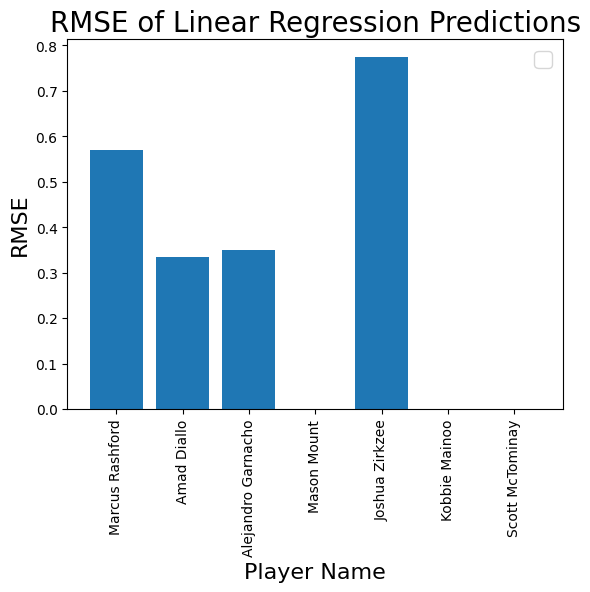

In [ ]:
#Plotting a bar chart showing the RMSE of each player of their Linear Regression predictions
plt.bar(player_ypred_rmse_df['player'][1:8], player_ypred_rmse_df['rmse'][1:8])
plt.title("RMSE of Linear Regression Predictions", fontsize=20)
plt.xlabel('players',fontsize=1)
plt.xlabel('Player Name', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('RMSE',fontsize=16)
plt.legend(fontsize=16)
plt.show()

/tmp/ipython-input-28-187611139.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


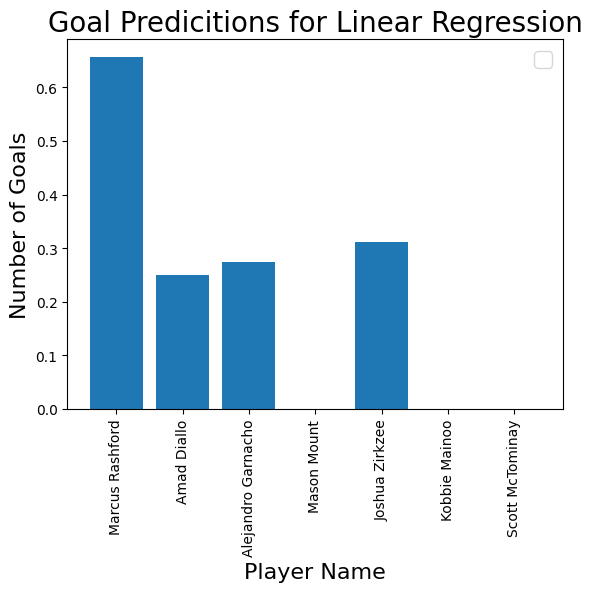

In [ ]:
#Plotting a bar chart showing the number of goals the Linear REgression model predicted for each player
plt.bar(player_ypred_rmse_df['player'][1:8], player_ypred_rmse_df['y_pred'][1:8])
plt.title("Goal Predicitions for Linear Regression", fontsize=20)
plt.xlabel('Player Name',fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Number of Goals',fontsize=16)
plt.legend(fontsize=16)
plt.show()

what player you wantMohamed Salah


/tmp/ipython-input-31-1423341384.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


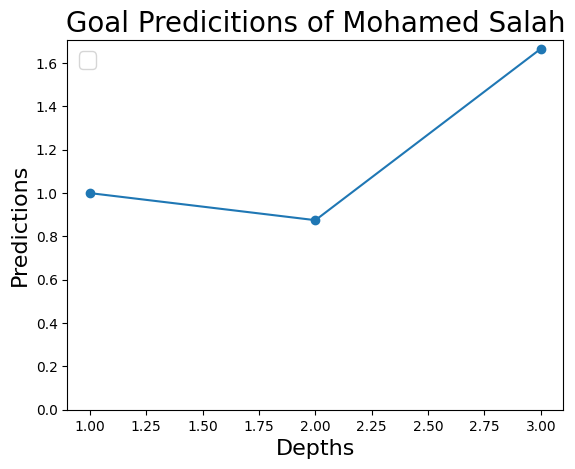

/tmp/ipython-input-31-1423341384.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


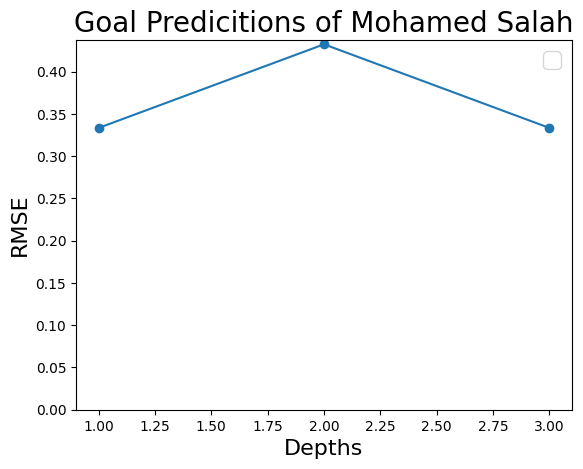

Best Prediction is 1.6666666666666667 because it has the smallest RMSE


In [ ]:
#By the user inputting a name of a football player we calculate their goal prediction using decision trees and then we caluculate the RMSE and plot the results on a line graph
#Then we state the best prediction which is the one with the smallest RMSE
import sys
player_name=input("what player you want")

depths=[1,2,3]
dt_rmse_list=[]
dt_prediction_list=[]
dt_y_pred=[]

df_player = df[df['Player'] == player_name].copy()
if len(df_player) >= 2:
  X=df_player.drop(columns=["Goals","Player","Team","Position","Pass Completion %"])
  y=df_player["Goals"]
  X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42, train_size=0.8)
  for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)
    dt_y_pred=dt.predict(X_test)
    dt_prediction_list.append(dt_y_pred)
    dt_rmse_list.append(mean_squared_error(y_test, dt_y_pred))

  total=0
  for i in range(3):
    dt_prediction_list[i]=dt_prediction_list[i].mean()

elif len(df_player)>=0:
  dt_rmse_list=[0,0,0]
  dt_prediction_list=[0,0,0]

else:
  sys.exit()

plt.plot(depths,dt_prediction_list,marker='o',linestyle='-')
plt.title(f"Goal Predicitions of {player_name}", fontsize=20)
plt.xlabel('Depths',fontsize=16)
plt.ylabel("Predictions",fontsize=16)
plt.ylim(bottom=0)
plt.legend(fontsize=16)
plt.show()

plt.plot(depths,dt_rmse_list,marker='o',linestyle='-')
plt.title(f"Goal Predicitions of {player_name}", fontsize=20)
plt.xlabel('Depths',fontsize=16)
plt.ylabel("RMSE",fontsize=16)
plt.ylim(bottom=0)
plt.legend(fontsize=16)
plt.show()

best_rmse=99
best_prediction=0

for i in range(len(dt_rmse_list)):
  if dt_rmse_list[i]<best_rmse:
    best_prediction=dt_prediction_list[i]

print(f"Best Prediction is {best_prediction} because it has the smallest RMSE")
